In [25]:
#Assalamu'Alaikum

In [353]:
#importing the pandas lib with alias pd
import pandas as pd
#reading the .csv dataset and assigning a dataframe
eren = pd.read_csv("Datasets/Kaggle/Titanic/train.csv")

In [27]:
#basic inspection

In [28]:
#viewing the first 10 rows
print(eren.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [355]:
#checking for duplicate rows
print(eren.duplicated().sum())

0


In [357]:
#no dupes found

In [41]:
#dataframe info
print(eren.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
#the above info output shows that there is data mising in some of the columns since they have non-null numbers
#complete columns must have all 891 non-null memebers, the columns with missing datad are:

#column    missing_data_count
#Age             177
#Cabin           687
#Embarked         2

In [49]:
#this verifies our above analysis
#we can also do this for specific columns:
print(eren['Age'].isnull().sum())
print(eren['Cabin'].isnull().sum())
print(eren['Embarked'].isnull().sum())
#respectively

177
687
2


<Axes: >

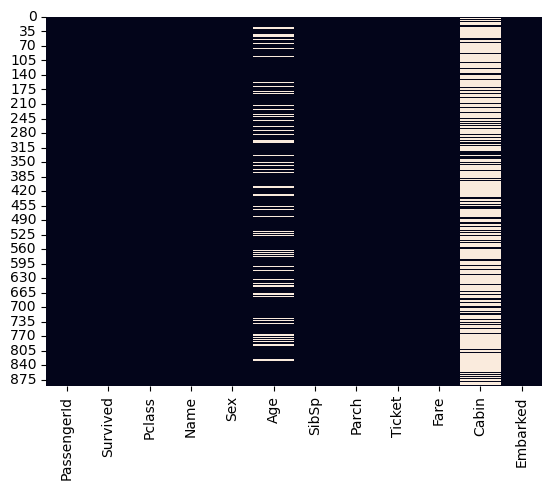

In [59]:
#making a heatmap of the missing/null values using seaborn
#importing the necessary libraries and assigning them aliases
import seaborn as sns
import matplotlib.pyplot as plt
#heatmap
sns.heatmap(eren.isnull(), cbar = False)
#the white gaps represent the missing values

In [115]:
#fixing the missing values by replacing them via fillna

In [91]:
#using mean, fixing 'Age'
#we fix the missing/null values by replacing them with the mean (average) of the remaining column since Age is numrical and it is possible that the median/mode may also be null
eren['Age'] = eren['Age'].fillna(eren['Age'].mean())

In [81]:
#checking
print(eren.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [109]:
#the 'Age' is now fixed
#using mode, fixing 'Embarked'
#checking mode of 'Embarked' column
print(eren['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [111]:
#we fill all the missing/null values by replacing them with the mode (most frequent value) of the column, non-numerical data only two missing, shouldn't make too much of a difference
eren['Embarked'] = eren['Embarked'].fillna(eren['Embarked'].mode()[0])

In [113]:
#checking
print(eren['Embarked'].isnull().sum())

0


In [117]:
#the 'Embarked' column is now fixed
#now fixing the 'Cabin' column
#we fill the null values with "unknown" since the data cannot be recovered
#using fillna again
eren['Cabin'] = eren['Cabin'].fillna('unknown')

In [123]:
#checking 
print(eren['Cabin'].isnull().sum())

0


In [125]:
#the 'Cabin' column nhas now been completely filled

<Axes: >

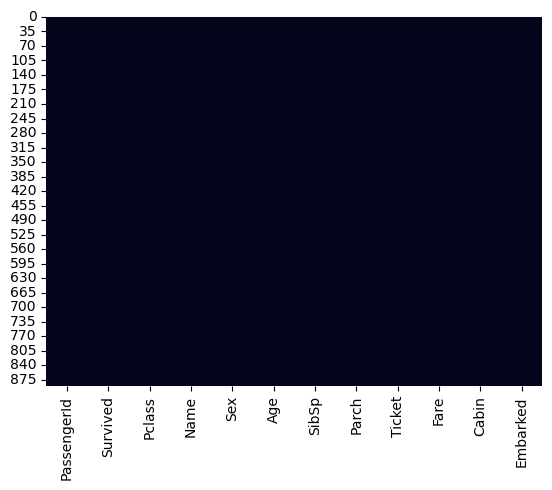

In [127]:
#checking the heatmap again
sns.heatmap(eren.isnull(), cbar = False)

In [129]:
#the heatmap is completely filled

In [131]:
#checking the info
print(eren.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [151]:
#All columns are filled
#checkinng for outliers
#box plot visualization of all numerical values

<Axes: ylabel='PassengerId'>

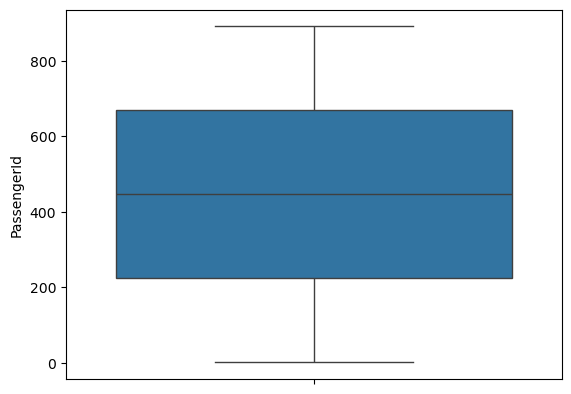

In [147]:
#Passenger ID
sns.boxplot(eren['PassengerId'])

In [ ]:
#no data outliers here, the box is very consistent

<Axes: ylabel='Survived'>

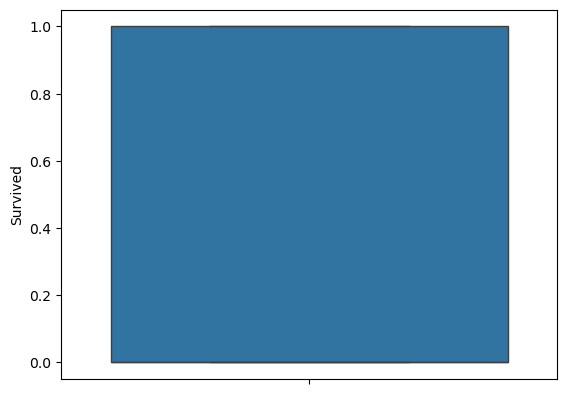

In [165]:
#Survived
sns.boxplot(eren['Survived'])

In [167]:
#no outlieres here, either 1 or 0, pretty consistent

<Axes: ylabel='Pclass'>

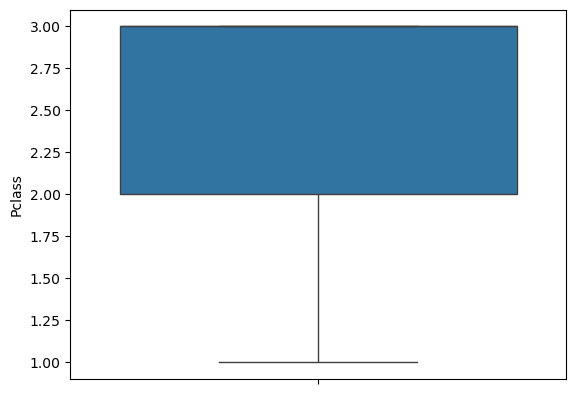

In [169]:
#Pclas
sns.boxplot(eren['Pclass'])

In [171]:
#no outliers here, the box plot is consistent

In [181]:
#since all the names from .info are objects, no outliers there

In [177]:
#Sex, since this is an object and can only be two, we check using value_counts
print(eren['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [179]:
#no outliers, the sex is binary

<Axes: ylabel='Age'>

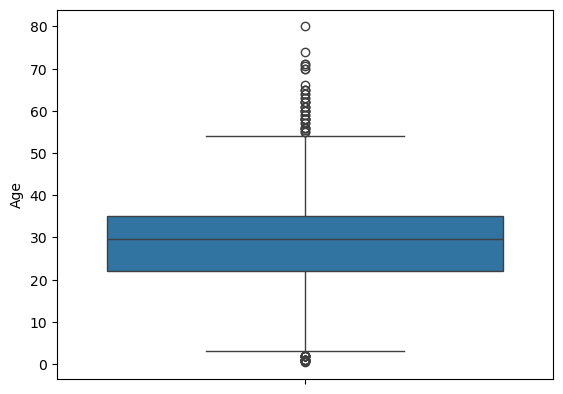

In [145]:
#Age
sns.boxplot(eren['Age'])

In [157]:
#checking the minimum age
print(eren['Age'].min())

0.42


In [159]:
#checking the maximum age
print(eren['Age'].max())

80.0


In [153]:
#no outliers here, sub 1 are assumed to be infants

<Axes: ylabel='SibSp'>

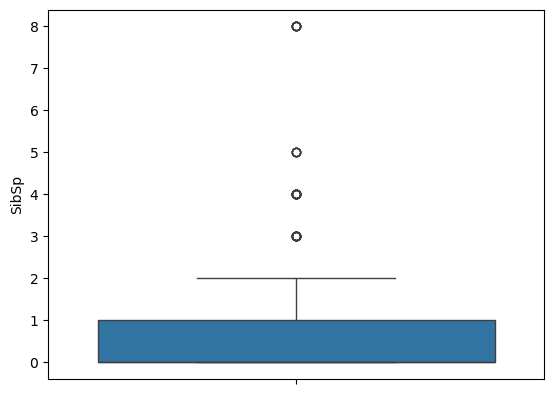

In [183]:
#SibSp
sns.boxplot(eren['SibSp'])

In [185]:
#checking count
print(eren['SibSp'].value_counts())

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


In [187]:
#the family relations seem to be fine, no potential outliers here

<Axes: ylabel='Parch'>

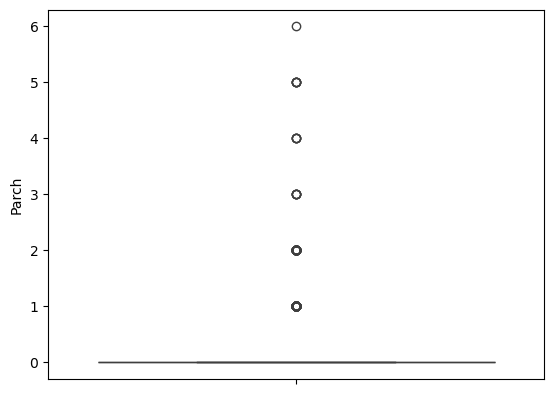

In [189]:
#Parch
sns.boxplot(eren['Parch'])

In [191]:
#checking count
print(eren['Parch'].value_counts())

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [193]:
#the box plot and the counts seem reasonable, no potential outliers

In [225]:
#Ticket
#checking for duplicates using value counts
tkt_val_cnt = eren['Ticket'].value_counts()
#printing dupes
print(tkt_val_cnt[val_cnt > 1])

Ticket
347082             7
CA. 2343           7
1601               7
3101295            6
CA 2144            6
                  ..
248738             2
12749              2
19996              2
S.C./PARIS 2079    2
349237             2
Name: count, Length: 134, dtype: int64


In [227]:
#no of dupes
print(eren['Ticket'].duplicated().sum())

210


In [359]:
#the dupe tickets must've been bought by a single person from a group, no potential outlier

<Axes: ylabel='Fare'>

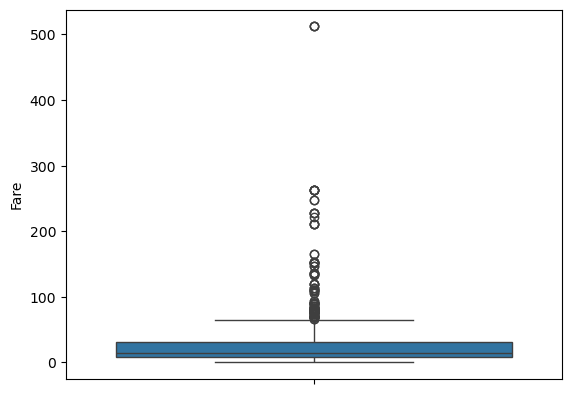

In [361]:
#fare
#boxplot
sns.boxplot(eren['Fare'])

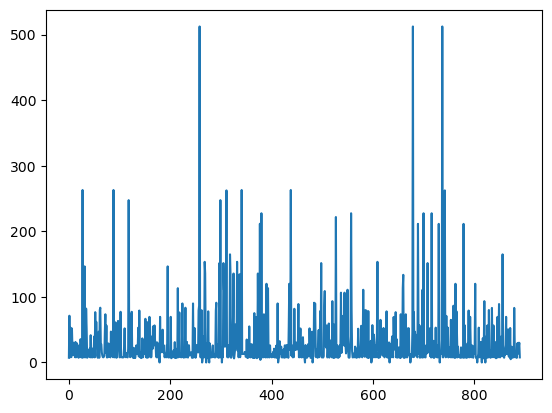

In [223]:
#bin plot
plt.plot(eren['Fare'])

In [231]:
#value counts
print(eren['Fare'].value_counts())

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


In [233]:
#the fare seems fine, there are a few jumps here and there but that may be due to more premium tickets

<Axes: ylabel='Cabin'>

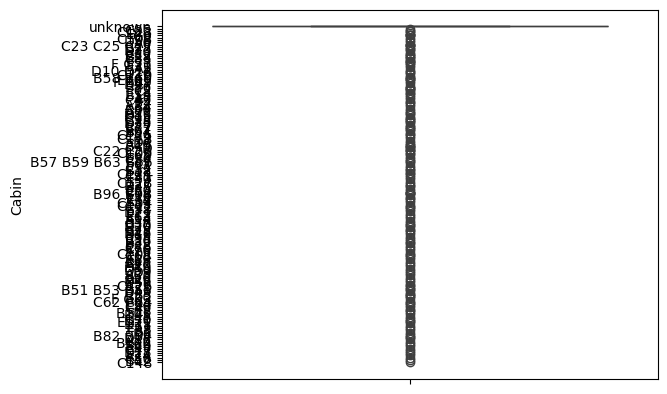

In [235]:
#cabin
#boxplot
sns.boxplot(eren['Cabin'])

In [239]:
#value counts
print(eren['Cabin'].value_counts())

Cabin
unknown        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64


In [241]:
#many are unknown, nothing can be done about that

<Axes: ylabel='Embarked'>

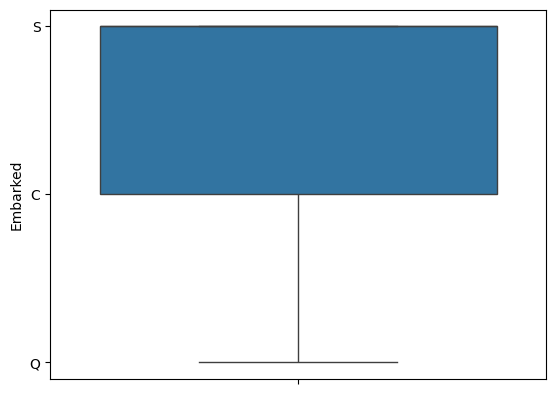

In [245]:
#Embarked
#boxplot
sns.boxplot(eren['Embarked'])

In [247]:
#seems good enough, no spots outside the whiskers therefore no potential outliers here

In [249]:
#no potential outliers were found in the dataset

In [261]:
#Data Encoding, label encoding is order based, one-hot is not but makes a new col for every category
#one-hot can work for the 'Sex' and 'Embarked' Columns
#for Ticket, Name and Cabin, Label Encoding is better suited

In [277]:
#applying One-Hot Encoding
#new dataframe as backup
eren_backup = eren
#should've created more backups lol

In [279]:
#using get dummies and directing the output to a new dataframe
eren_ohenc = pd.get_dummies(eren, columns = ['Sex','Embarked'])
#viewing output
print(eren_ohenc)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name        Age  SibSp  \
0                              Braund, Mr. Owen Harris  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.000000      1   
2                               Heikkinen, Miss. Laina  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.000000      1   
4                             Allen, Mr. William Henry  35.000000      0   
..                                                 ...        ...    ...   
886        

In [275]:
#the columns 'Sex' and 'Embarked' have been replaced by new columns for each of their respective categories and consist of binary data

In [283]:
#now applying label encoding
#another backup
eren_ohenc_backup = eren_ohenc

In [285]:
#using factorize
#final dataframe for the answer
eren_enc = eren_ohenc
#Name
eren_enc['Name'] = pd.factorize(eren['Name'])[0]
#Ticket
eren_enc['Ticket'] = pd.factorize(eren['Ticket'])[0]
#Cabin
eren_enc['Cabin'] = pd.factorize(eren['Cabin'])[0]
#viewing the result
print(eren_enc)

     PassengerId  Survived  Pclass  Name        Age  SibSp  Parch  Ticket  \
0              1         0       3     0  22.000000      1      0       0   
1              2         1       1     1  38.000000      1      0       1   
2              3         1       3     2  26.000000      0      0       2   
3              4         1       1     3  35.000000      1      0       3   
4              5         0       3     4  35.000000      0      0       4   
..           ...       ...     ...   ...        ...    ...    ...     ...   
886          887         0       2   886  27.000000      0      0     677   
887          888         1       1   887  19.000000      0      0     678   
888          889         0       3   888  29.699118      1      2     614   
889          890         1       1   889  26.000000      0      0     679   
890          891         0       3   890  32.000000      0      0     680   

        Fare  Cabin  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked

In [287]:
#eren_enc is the final numerically encoded dataset

In [289]:
#Numerical Value Standardization
#I decided to use Z-Score standardization since it is less sensitive to outliers
#Z-Score standardization transforms the result to have a mean of 0 and a standard deviation of 1

In [301]:
#importing the library and assigning an alias 'scaler'
from sklearn.preprocessing import StandardScaler

In [307]:
scaler = StandardScaler()

In [309]:
#using fit.transform to perform the Z-Score transformation
eren_scaled = scaler.fit_transform(eren_enc)

In [315]:
#dataframe conversion
eren_standardized = pd.DataFrame(eren_scaled, columns = eren_enc.columns)

In [319]:
#view the output dataset
print(eren_standardized)

     PassengerId  Survived    Pclass      Name       Age     SibSp     Parch  \
0      -1.730108 -0.789272  0.827377 -1.730108 -0.592481  0.432793 -0.473674   
1      -1.726220  1.266990 -1.566107 -1.726220  0.638789  0.432793 -0.473674   
2      -1.722332  1.266990  0.827377 -1.722332 -0.284663 -0.474545 -0.473674   
3      -1.718444  1.266990 -1.566107 -1.718444  0.407926  0.432793 -0.473674   
4      -1.714556 -0.789272  0.827377 -1.714556  0.407926 -0.474545 -0.473674   
..           ...       ...       ...       ...       ...       ...       ...   
886     1.714556 -0.789272 -0.369365  1.714556 -0.207709 -0.474545 -0.473674   
887     1.718444  1.266990 -1.566107  1.718444 -0.823344 -0.474545 -0.473674   
888     1.722332 -0.789272  0.827377  1.722332  0.000000  0.432793  2.008933   
889     1.726220  1.266990 -1.566107  1.726220 -0.284663 -0.474545 -0.473674   
890     1.730108 -0.789272  0.827377  1.730108  0.177063 -0.474545 -0.473674   

       Ticket      Fare     Cabin  Sex_

In [335]:
eren_preprocessed = eren_standardized
#the dataset has been preprocessed

In [323]:
#comparison

In [327]:
#importing the old dataset
eren_old = pd.read_csv("Datasets/Kaggle/Titanic/train.csv")

In [331]:
#info

In [333]:
#old
print(eren_old.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [337]:
#preprocessed
print(eren_preprocessed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    float64
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Ticket       891 non-null    float64
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Sex_female   891 non-null    float64
 11  Sex_male     891 non-null    float64
 12  Embarked_C   891 non-null    float64
 13  Embarked_Q   891 non-null    float64
 14  Embarked_S   891 non-null    float64
dtypes: float64(15)
memory usage: 104.5 KB
None


In [339]:
#all nulls fixed

In [351]:
#boxplot for outliers nad standardization

<Axes: >

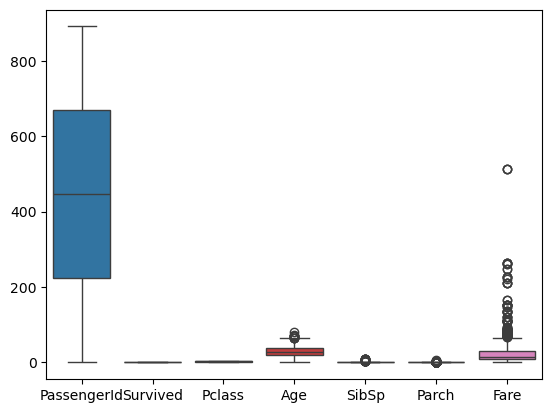

In [343]:
#old
sns.boxplot(eren_old)

<Axes: >

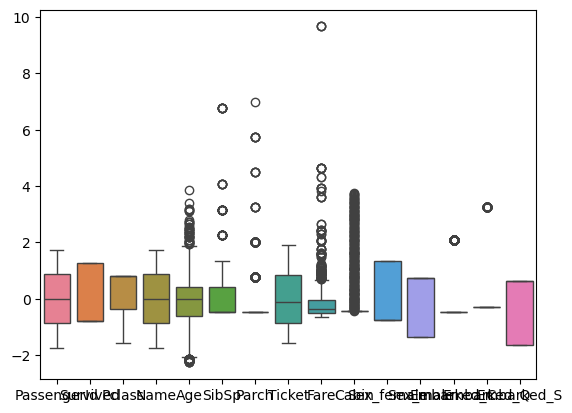

In [347]:
#preprocessed
sns.boxplot(eren_preprocessed)

In [349]:
#the outliers were removed or justified and the dataframe has been standardized